[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mlexchange/als_ml_tutorial/blob/main/4_1_ML_tutorial_chatGPT.ipynb)

# **chatGPT**
by OpenAI
What can we do with it?
ALWAYS be aware the answer could be VERY wrong.


Let see what we can do


1.   Read data
2.   Show the data
3.   Convert the data to a *tensor*
4.   Build a simple autoencoder
5.   Show input and output



Input to chatGPT 4.0:

*"I have a folder called "images" with jpg images and I want to load them and convert them to a pytorch tensor"*

Output:

In [ ]:
import os
from PIL import Image
import torch
from torchvision import transforms

# Initialize transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
])

# Folder path
folder_path = 'images'

# Read image file names from folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

# Initialize tensor for storing images
tensor_list = []

# Loop through image files to open, transform, and convert to tensor
for image_file in image_files:
    img_path = os.path.join(folder_path, image_file)
    with Image.open(img_path) as img:
        img_tensor = transform(img)
        tensor_list.append(img_tensor)

# Convert list of tensors to a single 4D tensor (Batch x Channels x Height x Width)
image_tensor = torch.stack(tensor_list)

# Print shape to confirm
print(image_tensor.shape)


ahh forgot the size:

"my images are 128 by 128 pixels, don't resize"
(THIS IS NOT TRUE, MY IMAGES ARE 64x64)

output:

In [ ]:
import os
from PIL import Image
import torch
from torchvision import transforms

# Initialize transformation
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
])

# Folder path
folder_path = 'images'

# Read image file names from folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

# Initialize tensor for storing images
tensor_list = []

# Loop through image files to open, transform, and convert to tensor
for image_file in image_files:
    img_path = os.path.join(folder_path, image_file)
    with Image.open(img_path) as img:
        img_tensor = transform(img)
        tensor_list.append(img_tensor)

# Convert list of tensors to a single 4D tensor (Batch x Channels x Height x Width)
image_tensor = torch.stack(tensor_list)

# Print shape to confirm
print(image_tensor.shape)


torch.Size([400, 1, 64, 64])


now I want to take a look
"show the last image using matplotlib"

Shape of the 4D tensor: torch.Size([400, 1, 64, 64])


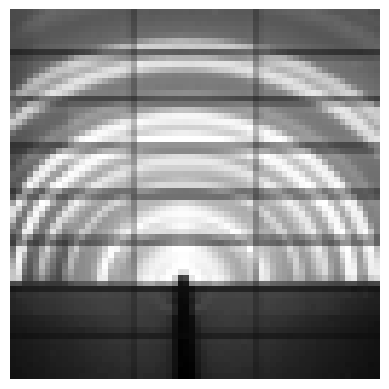

In [ ]:
import os
import numpy as np
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

# Initialize transformation
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to PyTorch tensor
])

# Folder path
folder_path = 'images'

# Read image file names from folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

# Initialize tensor for storing images
tensor_list = []

# Loop through image files to open, transform, and convert to tensor
for image_file in image_files:
    img_path = os.path.join(folder_path, image_file)
    with Image.open(img_path) as img:
        img_tensor = transform(img)
        tensor_list.append(img_tensor)

# Convert list of tensors to a single 4D tensor (Batch x Channels x Height x Width)
image_tensor = torch.stack(tensor_list)

# Print shape to confirm
print(f"Shape of the 4D tensor: {image_tensor.shape}")

# Show the last image using Matplotlib
# First, remove the batch dimension and convert to numpy array
last_image = image_tensor[-1].permute(1, 2, 0).numpy()

# If the image is grayscale, remove the last dimension
if last_image.shape[2] == 1:
    last_image = np.squeeze(last_image, axis=2)

plt.imshow(last_image, cmap='gray' if last_image.ndim == 2 else None)
plt.axis('off')
plt.show()


*"Let build a simple autoencoder and plot the resutls"*

output:

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load Images (repeat code from before)
transform = transforms.Compose([transforms.ToTensor()])
folder_path = 'images'
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
tensor_list = []

for image_file in image_files:
    img_path = os.path.join(folder_path, image_file)
    with Image.open(img_path) as img:
        img_tensor = transform(img)
        tensor_list.append(img_tensor)

image_tensor = torch.stack(tensor_list)

# Create DataLoader
batch_size = 8
dataset = TensorDataset(image_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Simple Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 3, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize model, loss, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
n_epochs = 10

for epoch in range(1, n_epochs + 1):
    for batch in dataloader:
        imgs, = batch
        outputs = model(imgs)
        loss = criterion(outputs, imgs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch}/{n_epochs}], Loss: {loss.item():.4f}")

# Show the original and reconstructed images
with torch.no_grad():
    model.eval()
    reconstructed = model(image_tensor[-1].unsqueeze(0))
    reconstructed = reconstructed.squeeze(0).permute(1, 2, 0).numpy()

original = image_tensor[-1].permute(1, 2, 0).numpy()

fig, axes = plt.subplots(1, 2)
axes[0].imshow(original)
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(reconstructed)
axes[1].set_title("Reconstructed")
axes[1].axis('off')

plt.show()


RuntimeError: ignored

Turns out the images are grayscale and only have a single channel, so I just copy
"
RuntimeError: Given groups=1, weight of size [64, 3, 3, 3], expected input[8, 1, 64, 64] to have 3 channels, but got 1 channels instead" into chatGPT


Option 1: Grayscale Images
Change the in_channels of nn.Conv2d to 1:

python
Copy code
self.encoder = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),  # Change here
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2)
)


lets try that

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([8, 1, 64, 64])) that is different to the input size (torch.Size([8, 3, 64, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/10], Loss: 0.0571
Epoch [2/10], Loss: 0.0191
Epoch [3/10], Loss: 0.0073
Epoch [4/10], Loss: 0.0056
Epoch [5/10], Loss: 0.0028
Epoch [6/10], Loss: 0.0035
Epoch [7/10], Loss: 0.0022
Epoch [8/10], Loss: 0.0022
Epoch [9/10], Loss: 0.0032
Epoch [10/10], Loss: 0.0031


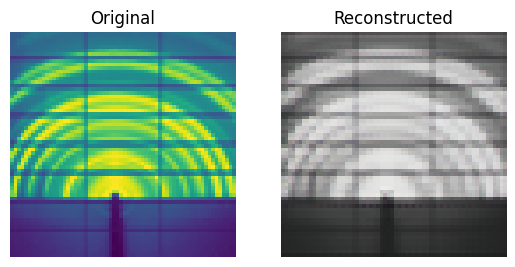

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load Images (repeat code from before)
transform = transforms.Compose([transforms.ToTensor()])
folder_path = 'images'
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
tensor_list = []

for image_file in image_files:
    img_path = os.path.join(folder_path, image_file)
    with Image.open(img_path) as img:
        img_tensor = transform(img)
        tensor_list.append(img_tensor)

image_tensor = torch.stack(tensor_list)

# Create DataLoader
batch_size = 8
dataset = TensorDataset(image_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Simple Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 3, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize model, loss, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
n_epochs = 10

for epoch in range(1, n_epochs + 1):
    for batch in dataloader:
        imgs, = batch
        outputs = model(imgs)
        loss = criterion(outputs, imgs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch}/{n_epochs}], Loss: {loss.item():.4f}")

# Show the original and reconstructed images
with torch.no_grad():
    model.eval()
    reconstructed = model(image_tensor[-1].unsqueeze(0))
    reconstructed = reconstructed.squeeze(0).permute(1, 2, 0).numpy()

original = image_tensor[-1].permute(1, 2, 0).numpy()

fig, axes = plt.subplots(1, 2)
axes[0].imshow(original)
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(reconstructed)
axes[1].set_title("Reconstructed")
axes[1].axis('off')

plt.show()


Works VERY well IF you know what you are doing.